In [3]:
# Mount Google Drive (for Colab)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


▶ First 5 rows:


,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%



▶ Summary statistics:


,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400,400,400,400,400,400,400,400
unique,7,400,11,84,87,188,194,9
top,9/3/2023 10:01,User_384,Video_Call,-85 dBm,5 ms,0.1 Mbps,0.1 Mbps,70%
freq,60,1,58,9,35,16,16,148



▶ DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


▶ ANOVA result:
ANOVA F = 435.5219
p-value = 2.4041e-204

▶ Correlation matrix:


,Signal_Z,Latency_Z,Required_Bandwidth,Allocated_Bandwidth,BW_Util_Ratio,Resource_Allocation
Signal_Z,1.000000,-0.392676,-0.380320,-0.376830,0.006250,0.303580
Latency_Z,-0.392676,1.000000,0.336098,0.333090,0.147214,-0.137848
Required_Bandwidth,-0.380320,0.336098,1.000000,0.999034,-0.198370,-0.494700
Allocated_Bandwidth,-0.376830,0.333090,0.999034,1.000000,-0.183876,-0.468436
BW_Util_Ratio,0.006250,0.147214,-0.198370,-0.183876,1.000000,0.295624
Resource_Allocation,0.303580,-0.137848,-0.494700,-0.468436,0.295624,1.000000


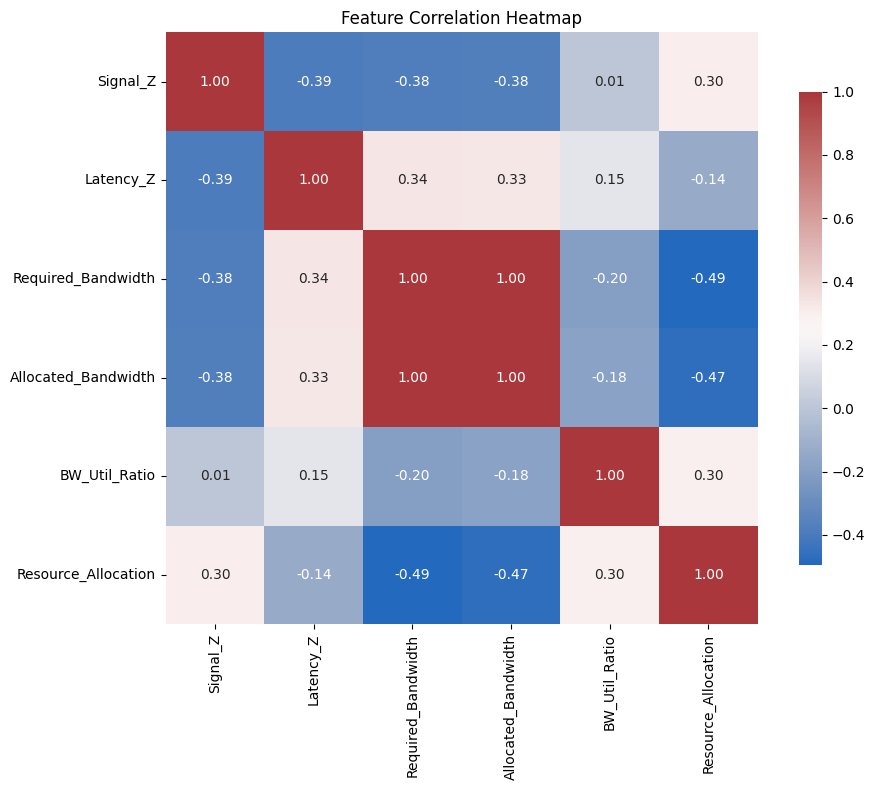


▶ Boxplot: Signal_Z


<ipython-input-19-aa09af3ff05e>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Application_Type', y=y, data=df, palette=palette, fliersize=3, zorder=zorder)


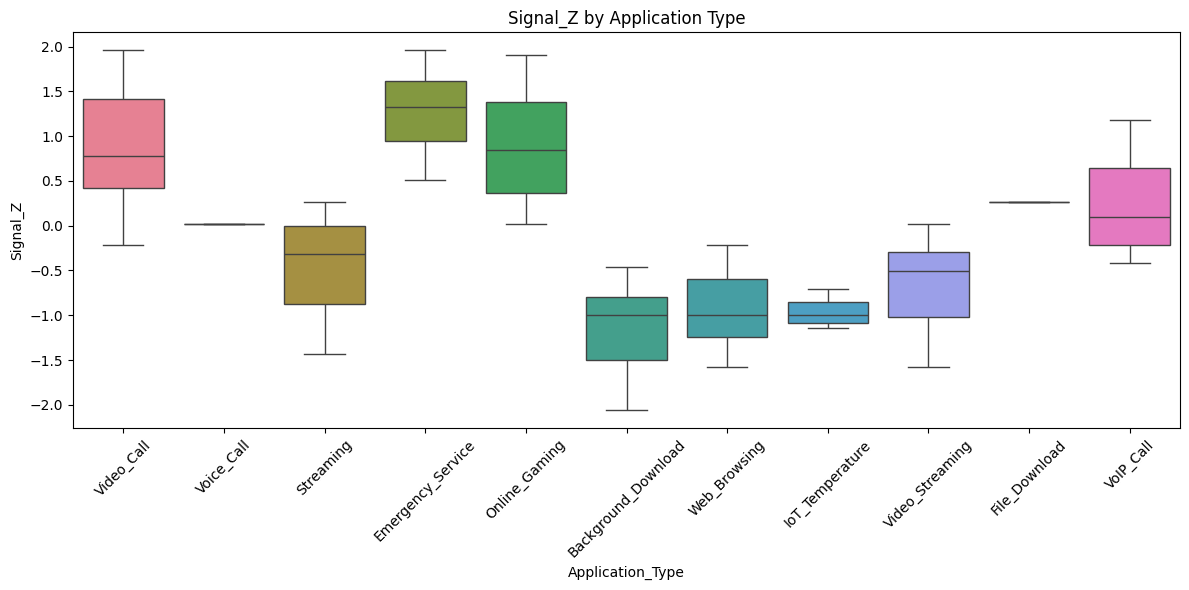


▶ Boxplot: Latency_Z


<ipython-input-19-aa09af3ff05e>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Application_Type', y=y, data=df, palette=palette, fliersize=3, zorder=zorder)


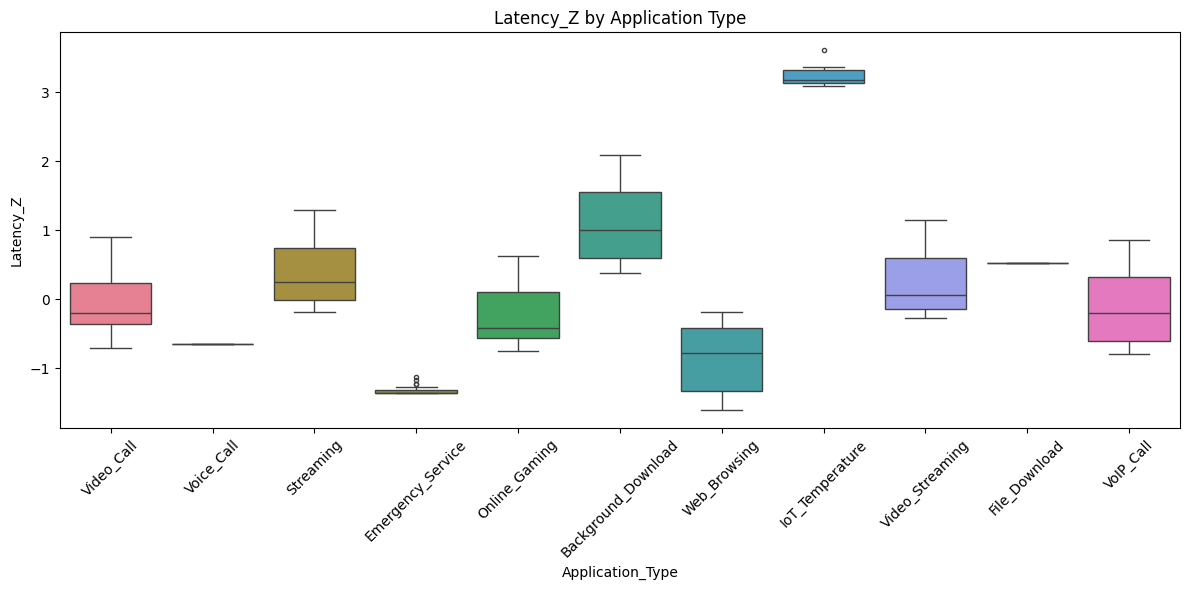


▶ Boxplot: Resource_Allocation


<ipython-input-19-aa09af3ff05e>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Application_Type', y=y, data=df, palette=palette, fliersize=3, zorder=zorder)


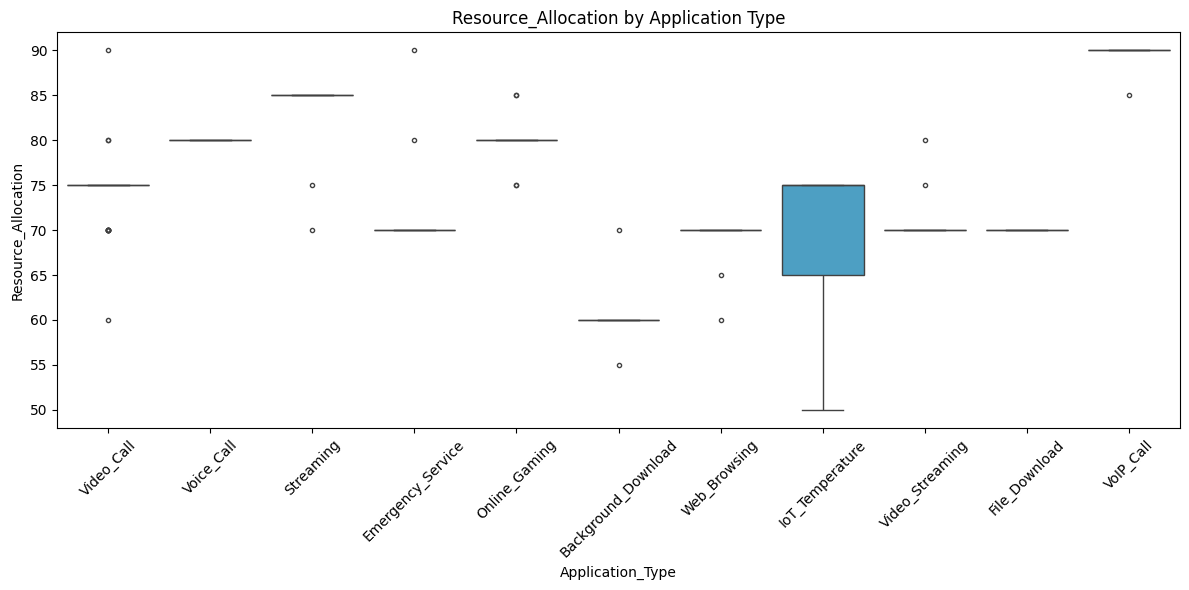

In [19]:

# === Library Imports ===
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

# === Paths ===
BASE_DIR   = '/content/drive/MyDrive/5G'
INPUT_CSV  = os.path.join(BASE_DIR, 'Quality_of_Service_5G.csv')
OUTPUT_DIR = os.path.join(BASE_DIR, 'results')
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Load Data ===
df_raw = pd.read_csv(INPUT_CSV)

# --- 1) Display & Save head + summary ---
print("▶ First 5 rows:")
display(df_raw.head())
df_raw.head().to_csv(os.path.join(OUTPUT_DIR, 'first_rows.csv'), index=False)

print("\n▶ Summary statistics:")
display(df_raw.describe())
df_raw.describe().to_csv(os.path.join(OUTPUT_DIR, 'summary_statistics.csv'))

# --- 2) Display & Save info() ---
buf = io.StringIO()
df_raw.info(buf=buf)
info_str = buf.getvalue()
print("\n▶ DataFrame info:")
print(info_str)
with open(os.path.join(OUTPUT_DIR, 'data_info.txt'), 'w') as f:
    f.write(info_str)

# --- 3) Clean & Convert ---
df = df_raw.copy()
df['Signal_Strength'] = df['Signal_Strength'].str.extract(r'(-\d+)').astype(int)
df['Latency']         = df['Latency'].str.extract(r'(\d+)').astype(int)
df['Required_Bandwidth']  = df['Required_Bandwidth'].str.extract(r'(\d+)').astype(float)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.extract(r'(\d+)').astype(float)
df['Resource_Allocation'] = df['Resource_Allocation'].str.rstrip('%').astype(int)

# --- 4) Feature Engineering ---
scaler = StandardScaler()
df[['Signal_Z', 'Latency_Z']] = scaler.fit_transform(df[['Signal_Strength','Latency']])
df['BW_Util_Ratio'] = df['Allocated_Bandwidth'] / df['Required_Bandwidth']

# --- 5) ANOVA Test ---
groups = [g['Resource_Allocation'].values for _, g in df.groupby('Application_Type')]
F, p = stats.f_oneway(*groups)
anova_text = f"ANOVA F = {F:.4f}\np-value = {p:.4e}"
print("\n▶ ANOVA result:")
print(anova_text)
with open(os.path.join(OUTPUT_DIR, 'anova_results.txt'), 'w') as f:
    f.write(anova_text)

# --- 6) Correlation Matrix & Heatmap ---
corr_cols = ['Signal_Z','Latency_Z','Required_Bandwidth','Allocated_Bandwidth','BW_Util_Ratio','Resource_Allocation']
corr_mat = df[corr_cols].corr()

print("\n▶ Correlation matrix:")
display(corr_mat)
corr_mat.to_csv(os.path.join(OUTPUT_DIR, 'feature_correlation_matrix.csv'), index=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='vlag', square=True,
            cbar_kws={'shrink':0.8})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
heatmap_path = os.path.join(OUTPUT_DIR, 'feature_correlation_heatmap.png')
plt.savefig(heatmap_path, dpi=300)
plt.show()

# --- 7) Boxplots by Application_Type ---
apps = df['Application_Type'].unique()
palette = dict(zip(apps, sns.color_palette('husl', len(apps))))

def plot_and_save(y, zorder=0):
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Application_Type', y=y, data=df, palette=palette, fliersize=3, zorder=zorder)
    plt.xticks(rotation=45)
    plt.title(f'{y} by Application Type')
    plt.tight_layout()
    fname = f'box_{y.lower()}.png'
    plt.savefig(os.path.join(OUTPUT_DIR, fname), dpi=300)
    plt.show()

print("\n▶ Boxplot: Signal_Z")
plot_and_save('Signal_Z', zorder=1)

print("\n▶ Boxplot: Latency_Z")
plot_and_save('Latency_Z', zorder=1)

print("\n▶ Boxplot: Resource_Allocation")
plot_and_save('Resource_Allocation', zorder=0)
